In [3]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
img = read_image('misc/demo.jpg')
img = t.from_numpy(img)[None]

In [5]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/yi/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [01:19<00:00, 6966953.99it/s] 


You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer

In [7]:
# in this machine the cupy isn't install correctly... 
# so it's a little slow
trainer.load('/home/cy/chainer_best_model_converted_to_pytorch_0.7053.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

AttributeError: module 'torch' has no attribute '_TensorBase'

# 2. model trained with torchvision pretrained model

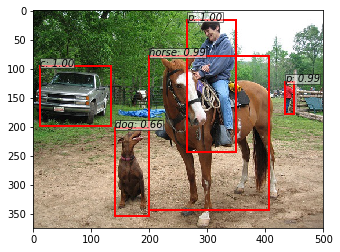

In [5]:
trainer.load('/home/cy/fasterrcnn_12211511_0.701052458187_torchvision_pretrain.pth')
opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 3. model trained with caffe pretrained model

/home/yi/Desktop/simple-faster-rcnn-pytorch/model/faster_rcnn.py:223: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = t.autograd.Variable(at.totensor(img).float()[None], volatile=True)


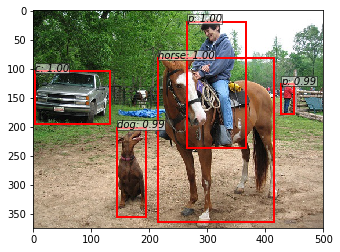

In [11]:
trainer.load('./fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

In [14]:
img = read_image('/media/yi/DATA/data-orig/kitti/training/image_2/000000.png')
img = t.from_numpy(img)[None]

/home/yi/Desktop/simple-faster-rcnn-pytorch/model/faster_rcnn.py:223: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = t.autograd.Variable(at.totensor(img).float()[None], volatile=True)


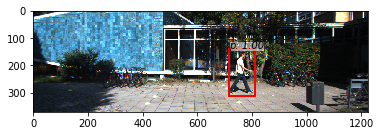

In [15]:
trainer.load('./fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

/home/yi/Desktop/simple-faster-rcnn-pytorch/model/faster_rcnn.py:223: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = t.autograd.Variable(at.totensor(img).float()[None], volatile=True)


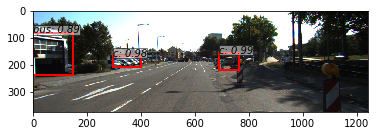

In [67]:
img = read_image('/media/yi/DATA/data-orig/kitti/training/image_2/000051.png')
img = t.from_numpy(img)[None]
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

In [68]:
_bboxes

[array([[ 80.66385,   0.     , 237.5954 , 148.83679],
        [156.94046, 687.7526 , 219.92545, 764.57086],
        [169.24081, 294.60602, 208.72852, 398.75116]], dtype=float32)]

In [69]:
_labels

[array([5, 6, 6], dtype=int32)]

In [70]:
_scores

[array([0.88840944, 0.9862023 , 0.9836865 ], dtype=float32)]